In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import copy
from Options.Classes import Vanilla, Barrier
from Options.Hedge import DeltaHedgeMonteCarlo, StaticDynamicDeltaHedgeMonteCarlo

def accurate(v1, v2, acc=1e-7):
    if abs(v1 - v2) < acc:
        return True
    else:
        return False

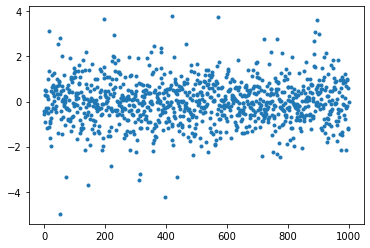

In [6]:
np.random.seed(99999999)

s = 100
k = 90
r = 0#.05
q = 0#.01
sigma = 0.5
t = 252/252
typeflag = "c"

MC_lens = 1000
T_lens = 252

c = Vanilla(s, k, r, q, sigma, t, typeflag)
pnl = DeltaHedgeMonteCarlo(c, MC_lens, T_lens)

plt.figure()
plt.plot(pnl, marker=".", ls=" ")
plt.show()

In [7]:
t_value = pnl.mean() / (pnl.std()/np.sqrt(len(pnl)))
t_value

-0.4931292196986642

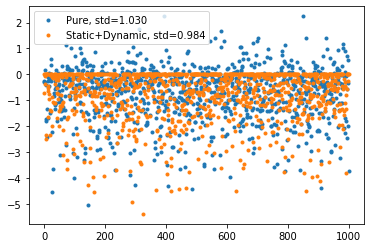

In [10]:
h = 80
rebate = 0

barrier = "do"

# Barrier

OptionClass = Barrier(s, k, r, q, sigma, t, h, rebate, barrier, typeflag)

pnl = DeltaHedgeMonteCarlo(OptionClass, MC_lens, T_lens)
pnl2 = StaticDynamicDeltaHedgeMonteCarlo(OptionClass, MC_lens, T_lens)

plt.figure()
plt.plot(pnl, marker=".", ls=" ", label="Pure, std=%.3f"%pnl.std())
plt.plot(pnl2, marker=".", ls=" ", label="Static+Dynamic, std=%.3f"%pnl2.std())
plt.legend()
plt.show()

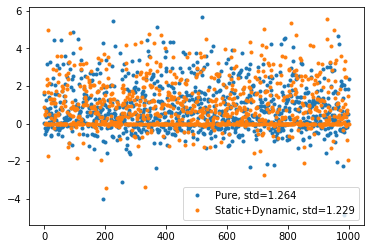

In [11]:
h = 80
rebate = 0

barrier = "di"

# Barrier

OptionClass = Barrier(s, k, r, q, sigma, t, h, rebate, barrier, typeflag)

pnl = DeltaHedgeMonteCarlo(OptionClass, MC_lens, T_lens)
pnl2 = StaticDynamicDeltaHedgeMonteCarlo(OptionClass, MC_lens, T_lens)

plt.figure()
plt.plot(pnl, marker=".", ls=" ", label="Pure, std=%.3f"%pnl.std())
plt.plot(pnl2, marker=".", ls=" ", label="Static+Dynamic, std=%.3f"%pnl2.std())
plt.legend()
plt.show()